# S05 - **P**rocesamiento de Datos

**A**dquisición

**L**impieza

**E**structuración

**P**rocesamiento

    El procesamiento de datos parte de un DATASET INPUT,
    que suponemos limpio y bien estructurado, para producir
    un DATASET OUTPUT que pueda ser visualizado o reportado
    directamente. Los resultados de el conjunto de datos
    de salida continen los datos finales procesados
    por un modelo estadístico o de aprendizaje que
    contiene los resultados principales del análisis.

**V**isualización

**A**utomatización

## Análisis Categóricos con Estadística Descriptiva

In [1]:
import pandas as pd

data = pd.read_excel("/content/ventas.xlsx")

data

,Venta,Producto,Precio,TotalVenta,ReputacionVendedor
0,1,A,21,98,BUENA
1,1,B,32,98,BUENA
2,1,B,45,98,BUENA
3,2,C,17,279,MALA
4,2,E,25,279,MALA
5,2,D,100,279,MALA
6,2,A,92,279,MALA
7,2,A,17,279,MALA
8,2,C,28,279,MALA
9,3,D,98,175,BUENA


### Método de Conteo Directo para un Eje **Categórico**

In [2]:
data["Venta"]

0     1
1     1
2     1
3     2
4     2
5     2
6     2
7     2
8     2
9     3
10    3
11    3
12    4
13    5
14    5
15    5
Name: Venta, dtype: int64

In [3]:
data["Venta"].unique()

array([1, 2, 3, 4, 5])

In [4]:
data["Venta"] == 2 # La serie de True | False donde la venta es igual a 2

0     False
1     False
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15    False
Name: Venta, dtype: bool

In [5]:
(data["Venta"] == 2).sum() # La suma de todos los valores True dentro de la serie de activación (comparativa)
                           # Los valores True en esta serie comparativa los supone 1 y False los supone 0

6

In [6]:
totales = []

for ventaId in data["Venta"].unique():
  total = (data["Venta"] == ventaId).sum()
  totales.append((ventaId, total))

totales

[(1, 3), (2, 6), (3, 3), (4, 1), (5, 3)]

In [9]:
totales_venta = pd.DataFrame(totales, columns=["Venta", "Total"])

totales_venta

,Venta,Total
0,1,3
1,2,6
2,3,3
3,4,1
4,5,3


In [11]:
totales = []

for producto in data["Producto"].unique():
  total = (data["Producto"] == producto).sum()
  totales.append((producto, total))

totales

[('A', 5), ('B', 4), ('C', 3), ('E', 2), ('D', 2)]

In [13]:
totales_producto = pd.DataFrame(totales, columns=["Producto", "Total"])

totales_producto

,Producto,Total
0,A,5
1,B,4
2,C,3
3,E,2
4,D,2


In [16]:
#totales = [(reputacion, (data["ReputacionVendedor"] == reputacion).sum()) for reputacion in data["ReputacionVendedor"] ]

totales_reputacion = pd.DataFrame(
    [(reputacion, (data["ReputacionVendedor"] == reputacion).sum()) for reputacion in data["ReputacionVendedor"].unique() ],
    columns=["ReputacionVendedor", "Total"]
)

totales_reputacion

,ReputacionVendedor,Total
0,BUENA,9
1,MALA,7


### Método de Conteo Por Agrupación para Ejes Categóricos

Un eje categórico puede ser utilizado para agrupar un *DataFrame*, es decir, una columna que se asuma como categórica (valores únicos finitos no ordenados) puede agrupar un *dataframe* y cada grupo concentrar una agregación, por ejemplo, la suma, el promedio, mínimo, el máximo o el conteo.

In [27]:
data.groupby("Venta").aggregate("count")

,Producto,Precio,TotalVenta,ReputacionVendedor
Venta,,,,
1,3,3,3,3
2,6,6,6,6
3,3,3,3,3
4,1,1,1,1
5,3,3,3,3


Si agregamos una columna adicional llamada **Total** podremos guardar los conteos de ceros o lo que contenga en la agrupación

In [29]:
data["Total"] = 0
# data[["Venta", "Total"]] es el sub-dataframe con solo esas dos columnas
data[["Venta", "Total"]].groupby("Venta").aggregate("count")

,Total
Venta,
1,3
2,6
3,3
4,1
5,3


In [30]:
data[["Venta", "Total"]] # Agrupamos todas las ventas y contamos los totales

,Venta,Total
0,1,0
1,1,0
2,1,0
3,2,0
4,2,0
5,2,0
6,2,0
7,2,0
8,2,0
9,3,0


In [31]:
data["Total"] = 1
data[["Venta", "Total"]].groupby("Venta").aggregate("sum")

,Total
Venta,
1,3
2,6
3,3
4,1
5,3


Conteos de categorías

In [69]:
data["TotalVentas"] = 0
data["TotalProducto"] = 0
data["TotalReputacionVendedor"] = 0

totales_venta = data[["Venta", "TotalVentas"]].groupby("Venta").aggregate("count").copy()
totales_producto = data[["Producto", "TotalProducto"]].groupby("Producto").aggregate("count").copy()
totales_reputacion = data[["ReputacionVendedor", "TotalReputacionVendedor"]].groupby("ReputacionVendedor").aggregate("count").copy()

In [35]:
totales_venta

,TotalVentas
Venta,
1,3
2,6
3,3
4,1
5,3


In [36]:
totales_producto

,TotalProducto
Producto,
A,5
B,4
C,3
D,2
E,2


In [37]:
totales_reputacion

,TotalReputacionVendedor
ReputacionVendedor,
BUENA,9
MALA,7


<Axes: xlabel='Venta', ylabel='TotalVentas'>

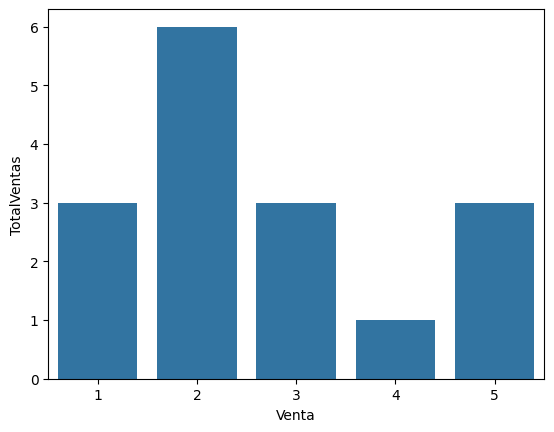

In [40]:
import seaborn as sns

sns.barplot(totales_venta, x="Venta", y="TotalVentas")

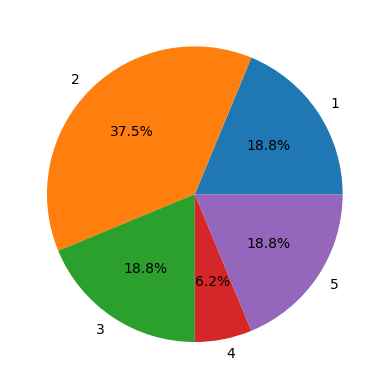

In [53]:
import matplotlib.pyplot as plt

plt.pie(totales_venta["TotalVentas"], labels=totales_venta.index, autopct="%.1f%%")
plt.savefig("Totales de Venta.png")
plt.show()

<Axes: xlabel='Producto', ylabel='TotalProducto'>

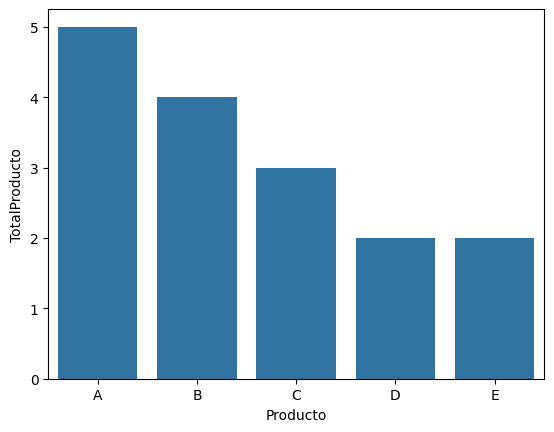

In [55]:
import seaborn as sns

sns.barplot(totales_producto, x="Producto", y="TotalProducto")

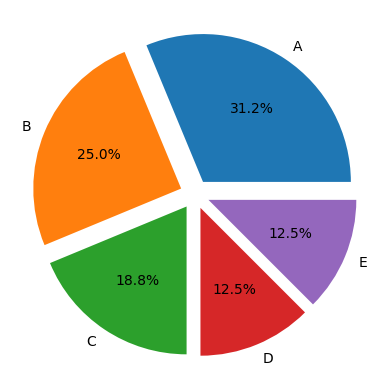

In [63]:
import matplotlib.pyplot as plt

plt.pie(totales_producto["TotalProducto"],
        labels=totales_producto.index,
        autopct="%.1f%%",
        explode=[0.1] * len(totales_producto))
plt.savefig("Total de Productos")
plt.show()

In [64]:
totales_venta

,TotalVentas
Venta,
1,3
2,6
3,3
4,1
5,3


In [70]:
totales_venta["PorcentajeVentas"] = 100 * totales_venta["TotalVentas"] / data["Venta"].count()
totales_venta

,TotalVentas,PorcentajeVentas
Venta,,
1,3,18.75
2,6,37.50
3,3,18.75
4,1,6.25
5,3,18.75


In [72]:
totales_producto["PorcentajeProducto"] = 100 * totales_producto["TotalProducto"] / data["Producto"].count()
totales_producto

,TotalProducto,PorcentajeProducto
Producto,,
A,5,31.25
B,4,25.00
C,3,18.75
D,2,12.50
E,2,12.50


### Caso de Estudio 1 - Calcular El porcentaje de productos buenos y malos para cada categoría

In [75]:
data1 = data[["Producto", "ReputacionVendedor"]].copy()
data1

,Producto,ReputacionVendedor
0,A,BUENA
1,B,BUENA
2,B,BUENA
3,C,MALA
4,E,MALA
5,D,MALA
6,A,MALA
7,A,MALA
8,C,MALA
9,D,BUENA


In [76]:
data1["Bueno"] = data1["ReputacionVendedor"] == "BUENA"
data1["Malo"] = data1["ReputacionVendedor"] == "MALA"
data1

,Producto,ReputacionVendedor,Bueno,Malo
0,A,BUENA,True,False
1,B,BUENA,True,False
2,B,BUENA,True,False
3,C,MALA,False,True
4,E,MALA,False,True
5,D,MALA,False,True
6,A,MALA,False,True
7,A,MALA,False,True
8,C,MALA,False,True
9,D,BUENA,True,False


In [81]:
data1["Total"] = 1
data1[["Producto", "Bueno", "Malo", "Total"]].groupby("Producto").aggregate("sum")

,Bueno,Malo,Total
Producto,,,
A,3,2,5
B,3,1,4
C,1,2,3
D,1,1,2
E,1,1,2


**Estrategia:** Tenemos un eje categórico de análisis que es el Producto, por cada producto necesitamos saber cuántos fueron buenos y malos en reputación, es decir, tenemos un segundo eje categórico que determina cuántos contar por cada producto.

Como tenemos dos ejes categóricos en linealidad matricial (ambos hacia abajo):

|Producto|Reputación|
|---|---|
|A|BUENA|
|A|MALA|
|B|BUENA|
|C|BUENA|
|A|MALA|
|B|MALA|
|C|BUENA|

Por lo que la categoría principal debe tener un eje distinto a la categoría secundaría, es decir, debemos transformar cada categória secundaria en un nuevo eje independiente de activación. A esto se le conoce como *sparse* (*dispersión o expansión categórico*)

|Producto|BUENA|MALA|
|---|---|---|
|A|1|0|
|A|0|1|
|B|1|0|
|C|1|0|
|A|0|1|
|B|0|1|
|C|1|0|

Ahora tenemos una columna categórica y dos columnas más de expansión, a esta matriz se le conoce como la *SPARSE-MATRIX*, lo cual forma un espacio llamado el espacio de *Pareto*.

Al llegar a esta matriz podemos hacer una agrupación por suma (`<data>.groupby(<eje principal>).aggregate("sum")`)

|Producto|BUENA|MALA|
|---|---|---|
|A|1|2|
|B|1|1|
|C|2|0|

## Análisis Nominal con Estadística Descriptiva

In [85]:
import pandas as pd

data = pd.read_excel("/content/ventas.xlsx")

data.sample(7)

,Venta,Producto,Precio,TotalVenta,ReputacionVendedor
9,3,D,98,175,BUENA
13,5,B,21,54,BUENA
14,5,C,25,54,BUENA
8,2,C,28,279,MALA
6,2,A,92,279,MALA
2,1,B,45,98,BUENA
5,2,D,100,279,MALA


In [86]:
data[["Precio"]].describe()

,Precio
count,16.000000
mean,39.062500
std,30.189333
min,8.000000
25%,20.500000
50%,26.500000
75%,45.000000
max,100.000000


<Axes: >

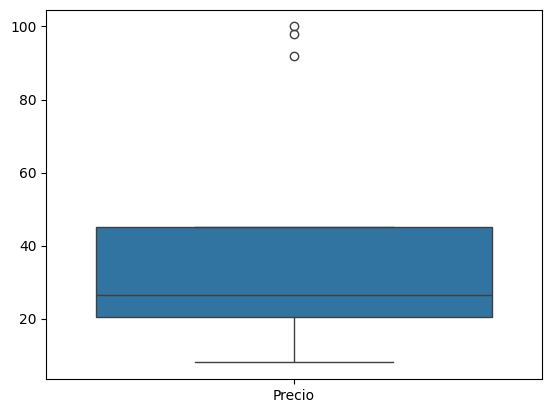

In [89]:
import seaborn as sns

sns.boxplot(data[["Precio"]])

Visualizar la distribución de datos para un Eje Continuo mediante el histograma de densidad

<Axes: xlabel='Precio', ylabel='Count'>

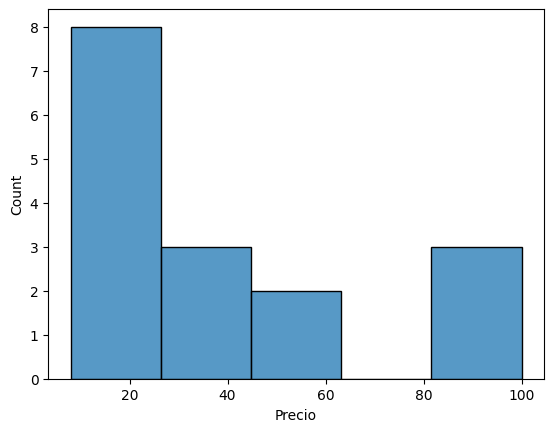

In [91]:
import seaborn as sns

sns.histplot(data["Precio"])

El **KDE Plot** muestra la distribución continua de nuestros datos, cada pico representará un valor masivo importante para el análisis, generalmente el más alto es el valor promedio o Q2 (cuatil 2 - percentil 50%).

<Axes: xlabel='Precio', ylabel='Density'>

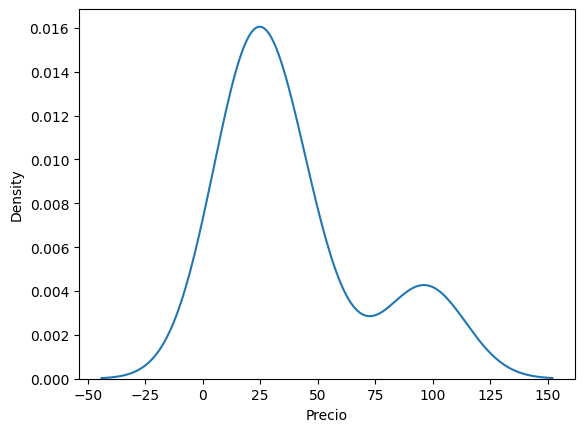

In [93]:
sns.kdeplot(data["Precio"])

El estimador 66% $(μ - σ, μ + σ)$ es el intervalo de confianza (un intervalo estadístico confiable) que espera que en este intervalo caigan aleatoriamente bajo una distrubución normal el 66% de los datos. Es decir, cerca del 66% de los datos totales estará en este intervalo.

In [90]:
data["Precio"].mean() - data["Precio"].std(), data["Precio"].mean() + data["Precio"].std()

(8.873166894856165, 69.25183310514383)

El estimador 95% $(μ - 2 \cdot σ, μ + 2 \cdot σ)$ es el intervalo de confianza (un intervalo estadístico confiable) que espera que en este intervalo caigan aleatoriamente bajo una distrubución normal el 95% de los datos. Es decir, cerca del 95% de los datos totales estará en este intervalo.

In [94]:
data["Precio"].mean() - 2 * data["Precio"].std(), data["Precio"].mean() + 2 * data["Precio"].std()

(-21.31616621028767, 99.44116621028766)

El estimador 99.5% $(μ - 3 \cdot σ, μ + 3 \cdot σ)$ es el intervalo de confianza (un intervalo estadístico confiable) que espera que en este intervalo caigan aleatoriamente bajo una distrubución normal el 99.5% de los datos. Es decir, cerca del 99.5% de los datos totales estará en este intervalo.

In [95]:
data["Precio"].mean() - 3 * data["Precio"].std(), data["Precio"].mean() + 3 * data["Precio"].std()

(-51.50549931543151, 129.6304993154315)

In [99]:
# data["Precio_CAT1"] = data["Precio"].map(lambda precio: precio >= data["Precio"].mean())
# data["Precio_CAT1"] = data["Precio"] >= data["Precio"].mean() # [F F T F F ...]
data["Precio_CAT1"] = (data["Precio"] >= data["Precio"].mean()).map({ True: "ALTO", False: "BAJO" })

data

,Venta,Producto,Precio,TotalVenta,ReputacionVendedor,Precio_CAT1
0,1,A,21,98,BUENA,BAJO
1,1,B,32,98,BUENA,BAJO
2,1,B,45,98,BUENA,ALTO
3,2,C,17,279,MALA,BAJO
4,2,E,25,279,MALA,BAJO
5,2,D,100,279,MALA,ALTO
6,2,A,92,279,MALA,ALTO
7,2,A,17,279,MALA,BAJO
8,2,C,28,279,MALA,BAJO
9,3,D,98,175,BUENA,ALTO


In [101]:
data1 = data[["Producto", "Precio_CAT1"]].copy()

data1

,Producto,Precio_CAT1
0,A,BAJO
1,B,BAJO
2,B,ALTO
3,C,BAJO
4,E,BAJO
5,D,ALTO
6,A,ALTO
7,A,BAJO
8,C,BAJO
9,D,ALTO


In [102]:
data1["Precio_Bajo"] = data1["Precio_CAT1"] == "BAJO"
data1["Precio_Alto"] = data1["Precio_CAT1"] == "ALTO"

data1

,Producto,Precio_CAT1,Precio_Bajo,Precio_Alto
0,A,BAJO,True,False
1,B,BAJO,True,False
2,B,ALTO,False,True
3,C,BAJO,True,False
4,E,BAJO,True,False
5,D,ALTO,False,True
6,A,ALTO,False,True
7,A,BAJO,True,False
8,C,BAJO,True,False
9,D,ALTO,False,True


In [104]:
data1[["Producto", "Precio_Bajo", "Precio_Alto"]].groupby("Producto").aggregate("sum")

,Precio_Bajo,Precio_Alto
Producto,,
A,4,1
B,3,1
C,3,0
D,0,2
E,1,1


In [106]:
data2 = data[["Producto", "Precio"]].copy()

data2

,Producto,Precio
0,A,21
1,B,32
2,B,45
3,C,17
4,E,25
5,D,100
6,A,92
7,A,17
8,C,28
9,D,98


In [108]:
precios_suma = data2[["Producto", "Precio"]].groupby("Producto").aggregate("sum").copy()

precios_suma

,Precio
Producto,
A,170
B,117
C,70
D,198
E,70


<Axes: xlabel='Producto', ylabel='Precio'>

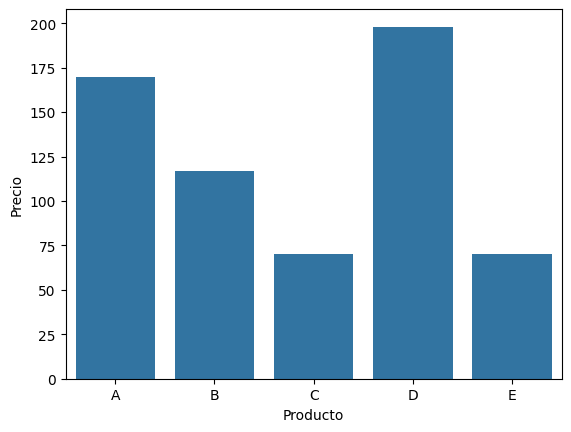

In [109]:
import seaborn as sns

sns.barplot(precios_suma, x="Producto", y="Precio")

In [119]:
data2["Total"] = 0
precios_total = data2[["Producto", "Total"]].groupby("Producto").aggregate("count").copy()

precios_total

,Total
Producto,
A,5
B,4
C,3
D,2
E,2


In [121]:
data3 = pd.concat([precios_suma, precios_total], axis=1).copy()

data3

,Precio,Total
Producto,,
A,170,5
B,117,4
C,70,3
D,198,2
E,70,2


In [122]:
data3["Eficiencia"] = data3["Precio"] / data3["Total"]

data3

,Precio,Total,Eficiencia
Producto,,,
A,170,5,34.000000
B,117,4,29.250000
C,70,3,23.333333
D,198,2,99.000000
E,70,2,35.000000


In [126]:
data3.loc["A"]["Eficiencia"]

34.0

In [127]:
data3.loc["B"]["Eficiencia"]

29.25

In [123]:
data

,Venta,Producto,Precio,TotalVenta,ReputacionVendedor,Precio_CAT1
0,1,A,21,98,BUENA,BAJO
1,1,B,32,98,BUENA,BAJO
2,1,B,45,98,BUENA,ALTO
3,2,C,17,279,MALA,BAJO
4,2,E,25,279,MALA,BAJO
5,2,D,100,279,MALA,ALTO
6,2,A,92,279,MALA,ALTO
7,2,A,17,279,MALA,BAJO
8,2,C,28,279,MALA,BAJO
9,3,D,98,175,BUENA,ALTO


In [128]:
data["Eficiencia"] = data["Producto"].map(lambda producto: data3.loc[producto]["Eficiencia"])

data

,Venta,Producto,Precio,TotalVenta,ReputacionVendedor,Precio_CAT1,Eficiencia
0,1,A,21,98,BUENA,BAJO,34.000000
1,1,B,32,98,BUENA,BAJO,29.250000
2,1,B,45,98,BUENA,ALTO,29.250000
3,2,C,17,279,MALA,BAJO,23.333333
4,2,E,25,279,MALA,BAJO,35.000000
5,2,D,100,279,MALA,ALTO,99.000000
6,2,A,92,279,MALA,ALTO,34.000000
7,2,A,17,279,MALA,BAJO,34.000000
8,2,C,28,279,MALA,BAJO,23.333333
9,3,D,98,175,BUENA,ALTO,99.000000


In [130]:
data["I1"] = data["Precio"] / data["Eficiencia"]

data

,Venta,Producto,Precio,TotalVenta,ReputacionVendedor,Precio_CAT1,Eficiencia,I1
0,1,A,21,98,BUENA,BAJO,34.000000,0.617647
1,1,B,32,98,BUENA,BAJO,29.250000,1.094017
2,1,B,45,98,BUENA,ALTO,29.250000,1.538462
3,2,C,17,279,MALA,BAJO,23.333333,0.728571
4,2,E,25,279,MALA,BAJO,35.000000,0.714286
5,2,D,100,279,MALA,ALTO,99.000000,1.010101
6,2,A,92,279,MALA,ALTO,34.000000,2.705882
7,2,A,17,279,MALA,BAJO,34.000000,0.500000
8,2,C,28,279,MALA,BAJO,23.333333,1.200000
9,3,D,98,175,BUENA,ALTO,99.000000,0.989899


<Axes: xlabel='Precio', ylabel='I1'>

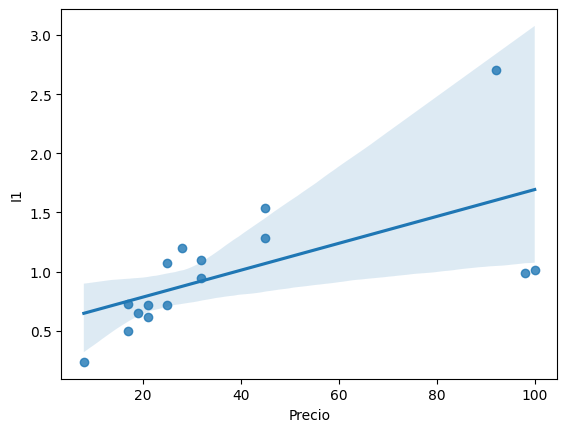

In [133]:
import seaborn as sns

sns.regplot(data, x="Precio", y="I1") # Hay una regresión inicial que se pierde al final

In [137]:
data4 = data[ data["Precio"] <= 60 ].copy()

data4

,Venta,Producto,Precio,TotalVenta,ReputacionVendedor,Precio_CAT1,Eficiencia,I1
0,1,A,21,98,BUENA,BAJO,34.000000,0.617647
1,1,B,32,98,BUENA,BAJO,29.250000,1.094017
2,1,B,45,98,BUENA,ALTO,29.250000,1.538462
3,2,C,17,279,MALA,BAJO,23.333333,0.728571
4,2,E,25,279,MALA,BAJO,35.000000,0.714286
7,2,A,17,279,MALA,BAJO,34.000000,0.500000
8,2,C,28,279,MALA,BAJO,23.333333,1.200000
10,3,E,45,175,BUENA,ALTO,35.000000,1.285714
11,3,A,32,175,BUENA,BAJO,34.000000,0.941176
12,4,B,19,19,MALA,BAJO,29.250000,0.649573


<Axes: xlabel='Precio', ylabel='I1'>

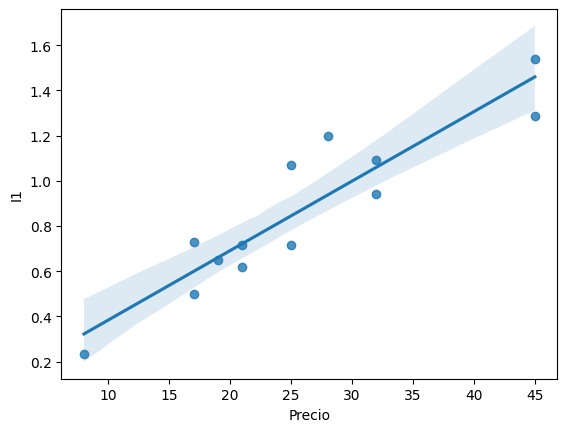

In [138]:
import seaborn as sns

sns.regplot(data4, x="Precio", y="I1") # Hay una regresión inicial que se pierde al final

## Caso de Estudio 2 - Análisis de las Plantas IRIS

In [151]:
import pandas as pd

iris = pd.read_csv("/content/iris.csv")

iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [152]:
iris.columns = ["SL", "SW", "PL", "PW", "X"]

iris

,SL,SW,PL,PW,X
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [153]:
iris["X"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [154]:
iris["D"] = iris["X"].map({ "Setosa": "A", "Versicolor": "B", "Virginica": "C" })

iris.sample(5)

,SL,SW,PL,PW,X,D
117,7.7,3.8,6.7,2.2,Virginica,C
22,4.6,3.6,1.0,0.2,Setosa,A
72,6.3,2.5,4.9,1.5,Versicolor,B
148,6.2,3.4,5.4,2.3,Virginica,C
73,6.1,2.8,4.7,1.2,Versicolor,B


*Sparse Matrix*

In [155]:
iris["A"] = (iris["D"] == "A").map({ True: 1, False: 0 })
iris["B"] = (iris["D"] == "B").map({ True: 1, False: 0 })
iris["C"] = (iris["D"] == "C").map({ True: 1, False: 0 })

iris.sample(5)

,SL,SW,PL,PW,X,D,A,B,C
92,5.8,2.6,4.0,1.2,Versicolor,B,0,1,0
144,6.7,3.3,5.7,2.5,Virginica,C,0,0,1
47,4.6,3.2,1.4,0.2,Setosa,A,1,0,0
139,6.9,3.1,5.4,2.1,Virginica,C,0,0,1
114,5.8,2.8,5.1,2.4,Virginica,C,0,0,1


In [157]:
X = iris[["SL", "SW", "PL", "PW"]].values # .values -> Matriz de valores

X # Matriz de características

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [158]:
Y = iris[["A", "B", "C"]].values # .values -> Matriz de valores

Y # Matriz de objetivos

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

**SKLearn** (*Sci-kit Learn | Herramientas Científicas de Aprendizaje*) es una librería para Python basada en Numpy que nos permite aplicar modelos de aprendizaje automático e inteligencia artificial para establecer modelos de aprendizaje (Clasificación | Regresión).

*Referencia*: [https://scikit-learn.org/stable/index.html](https://scikit-learn.org/stable/index.html)

[Text(0.5, 0.75, 'x[2] <= 2.45\ngini = 0.444\nsamples = 150\nvalue = [100, 50]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 100\nvalue = [100, 0]')]

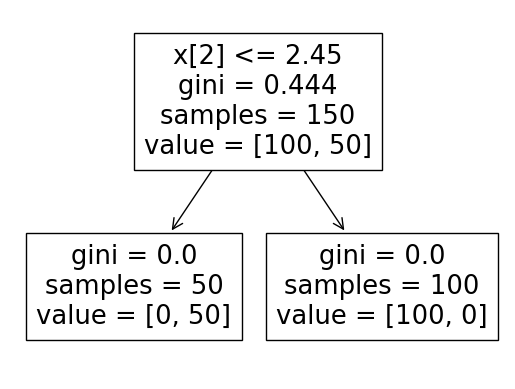

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier()

clf.fit(X, Y[:, 0]) # La categoría 0 - A (Setosa)

plot_tree(clf)

In [162]:
clf.predict([
    [7.7,	3.8,	6.7,	2.2],
    [4.6,	3.6,	1.0,	0.2],
    [6.3,	2.5,	4.9,	1.5],
    [6.2,	3.4,	5.4,	2.3],
    [6.1,	2.8,	4.7,	1.2],
])

array([0, 1, 0, 0, 0])

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.444\nsamples = 150\nvalue = [100, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [5, 49]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [1, 47]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0

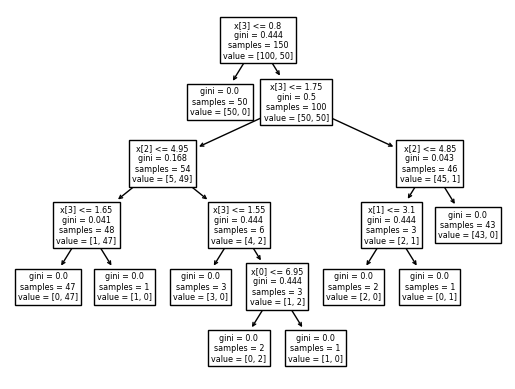

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier()

clf.fit(X, Y[:, 1]) # La categoría 1 - B (Versicolor)

plot_tree(clf)

In [164]:
clf.predict([
    [7.7,	3.8,	6.7,	2.2],
    [4.6,	3.6,	1.0,	0.2],
    [6.3,	2.5,	4.9,	1.5],
    [6.2,	3.4,	5.4,	2.3],
    [6.1,	2.8,	4.7,	1.2],
])

array([0, 0, 1, 0, 1])

[Text(0.5769230769230769, 0.9, 'x[3] <= 1.75\ngini = 0.444\nsamples = 150\nvalue = [100, 50]'),
 Text(0.3076923076923077, 0.7, 'x[2] <= 4.95\ngini = 0.092\nsamples = 104\nvalue = [99, 5]'),
 Text(0.15384615384615385, 0.5, 'x[3] <= 1.65\ngini = 0.02\nsamples = 98\nvalue = [97, 1]'),
 Text(0.07692307692307693, 0.3, 'gini = 0.0\nsamples = 97\nvalue = [97, 0]'),
 Text(0.23076923076923078, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.46153846153846156, 0.5, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.38461538461538464, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5384615384615384, 0.3, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.46153846153846156, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6153846153846154, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8461538461538461, 0.7, 'x[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [1, 45]'),
 Text(0.7692307692307693, 0.5, 'x[0] <= 5.95\ngini = 0.444\n

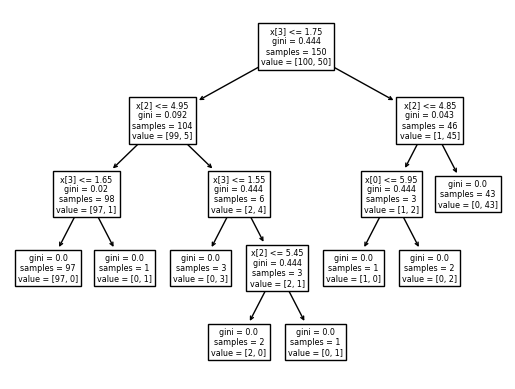

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier()

clf.fit(X, Y[:, 2]) # La categoría 2 - C (Virginica)

plot_tree(clf)

In [166]:
clf.predict([
    [7.7,	3.8,	6.7,	2.2],
    [4.6,	3.6,	1.0,	0.2],
    [6.3,	2.5,	4.9,	1.5],
    [6.2,	3.4,	5.4,	2.3],
    [6.1,	2.8,	4.7,	1.2],
])

array([1, 0, 0, 1, 0])

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.444\nsamples = 150\nvalue = [[100, 50]\n[100, 50]\n[100, 50]]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [[0, 50]\n[50, 0]\n[50, 0]]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.333\nsamples = 100\nvalue = [[100, 0]\n[50, 50]\n[50, 50]]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.112\nsamples = 54\nvalue = [[54, 0]\n[5, 49]\n[49, 5]]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.027\nsamples = 48\nvalue = [[48, 0]\n[1, 47]\n[47, 1]]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [[47, 0]\n[0, 47]\n[47, 0]]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[1, 0]\n[0, 1]]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.296\nsamples = 6\nvalue = [[6, 0]\n[4, 2]\n[2, 4]]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [[3, 0]\n[3, 0]\n[0, 3

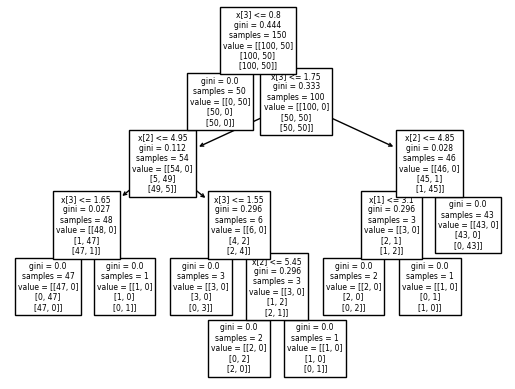

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier()

clf.fit(X, Y) # Todas las Categorías

plot_tree(clf)

In [169]:
clf.predict([
    [7.7,	3.8,	6.7,	2.2],
    [4.6,	3.6,	1.0,	0.2],
    [6.3,	2.5,	4.9,	1.5],
    [6.2,	3.4,	5.4,	2.3],
    [6.1,	2.8,	4.7,	1.2],
])

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [170]:
clf.score(X, Y)

1.0

In [177]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation="tanh")

clf.fit(X, Y) # Todas las Categorías

clf.score(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8733333333333333

In [180]:
from sklearn.svm import SVC

clf = SVC()

clf.fit(X, Y[:,0]) # Todas las Categorías

clf.score(X, Y[:,0])

1.0

In [181]:
from sklearn.svm import SVC

clf = SVC()

clf.fit(X, Y[:,1]) # Todas las Categorías

clf.score(X, Y[:,1])

0.9466666666666667

In [182]:
from sklearn.svm import SVC

clf = SVC()

clf.fit(X, Y[:,2]) # Todas las Categorías

clf.score(X, Y[:,2])

0.9733333333333334

# S05 - **V**isualización de Datos

**A**dquisición

**L**impieza

**E**structuración

**P**rocesamiento

**V**isualización

    La visualización de datos consiste
    en representar múlples ejes categorícos
    y nominales dentro de un reporte que
    demuestre el comportamiento de los datos
    por sí mismo, puede ser un reporte gráfico
    o un reporte estadístico.

**A**utomatización

Anális en 1D

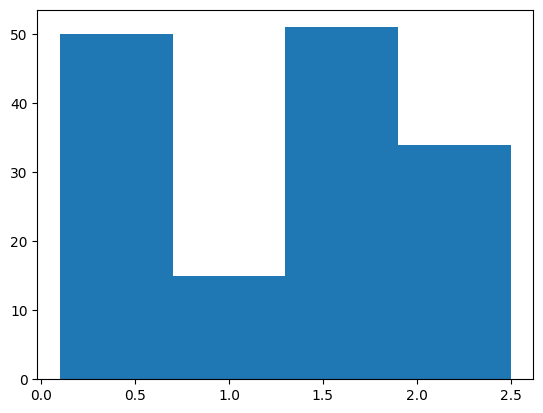

In [184]:
# Mostrar la distribución de los anchos del pétalo

import matplotlib.pyplot as plt

plt.hist(iris["PW"], bins=4)
plt.show()

In [187]:
import numpy as np

np.histogram(iris["PW"], bins=4)

(array([50, 15, 51, 34]), array([0.1, 0.7, 1.3, 1.9, 2.5]))

In [188]:
np.histogram(iris["PW"], bins=4, density=True)

(array([0.55555556, 0.16666667, 0.56666667, 0.37777778]),
 array([0.1, 0.7, 1.3, 1.9, 2.5]))

<Axes: >

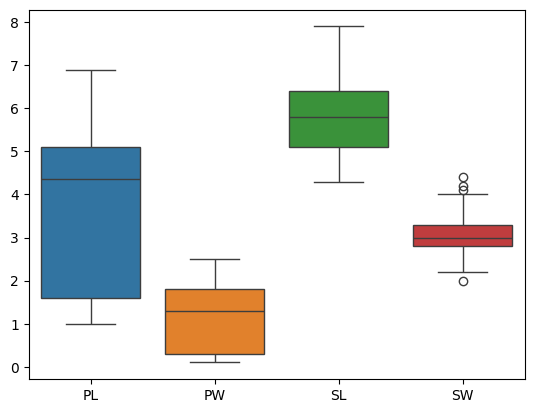

In [191]:
import seaborn as sns

sns.boxplot(iris[["PL", "PW", "SL", "SW"]])

In [192]:
iris[["PL", "PW", "SL", "SW"]].describe()

,PL,PW,SL,SW
count,150.000000,150.000000,150.000000,150.000000
mean,3.758000,1.199333,5.843333,3.057333
std,1.765298,0.762238,0.828066,0.435866
min,1.000000,0.100000,4.300000,2.000000
25%,1.600000,0.300000,5.100000,2.800000
50%,4.350000,1.300000,5.800000,3.000000
75%,5.100000,1.800000,6.400000,3.300000
max,6.900000,2.500000,7.900000,4.400000


In [195]:
iris[["X", "PL", "PW", "SL", "SW"]].groupby("X").aggregate("mean")

,PL,PW,SL,SW
X,,,,
Setosa,1.462,0.246,5.006,3.428
Versicolor,4.260,1.326,5.936,2.770
Virginica,5.552,2.026,6.588,2.974


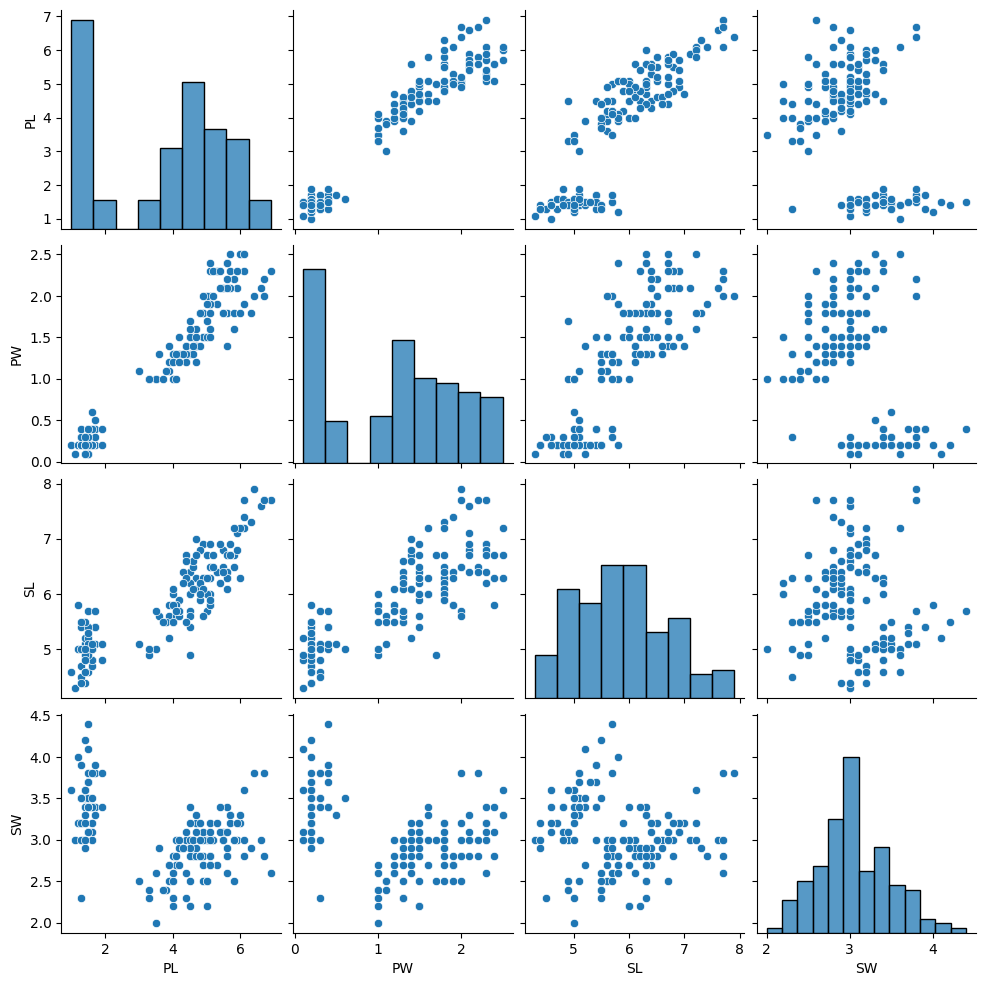

In [196]:
import seaborn as sns

sns.pairplot(iris[["X", "PL", "PW", "SL", "SW"]])

<Axes: xlabel='PW', ylabel='SL'>

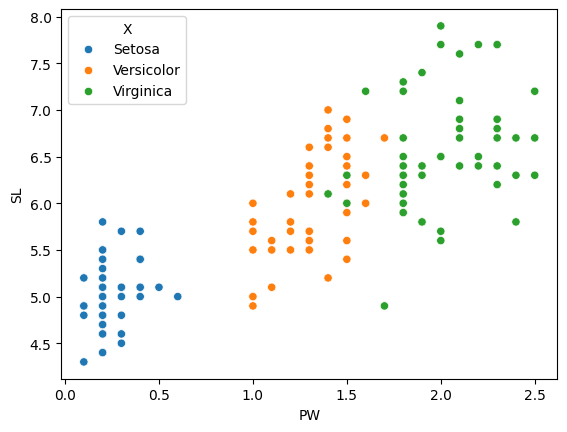

In [200]:
import seaborn

sns.scatterplot(iris, x="PW", y="SL", hue="X")

<Axes: xlabel='PW', ylabel='SW'>

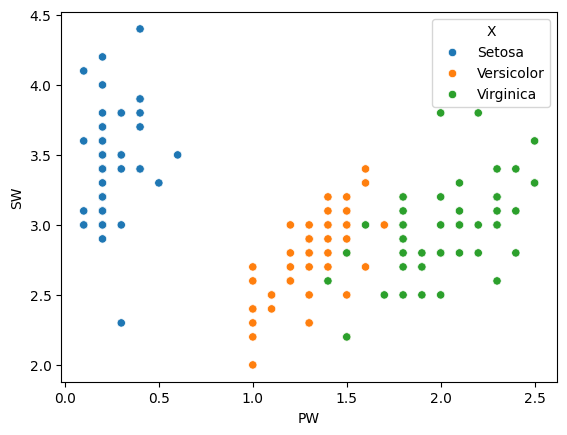

In [199]:
import seaborn

sns.scatterplot(iris, x="PW", y="SW", hue="X")

1D

1D + 1C

---

2D

2D + 1C

2D + 1T

2D + 1C + 1T

---

3D

3D + 1C

3D + 1T

3D + 1C + 1T

---

Mapas

Redes